In [9]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [11]:
#prevent pandas from truncating output
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [13]:
#to read the csv file
loan = pd.read_csv("/Users/jeevetha/Documents/LendingClubCaseStudy/loan.csv", low_memory=False)


In [15]:
#sample the dataframe
loan.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [17]:
#get the list of columns
loan.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [19]:
#to see the shape of the data frame
loan.shape

(39717, 111)

In [21]:
#unique variables per column
print(loan.nunique())

id                                39717
member_id                         39717
loan_amnt                           885
funded_amnt                        1041
funded_amnt_inv                    8205
term                                  2
int_rate                            371
installment                       15383
grade                                 7
sub_grade                            35
emp_title                         28820
emp_length                           11
home_ownership                        5
annual_inc                         5318
verification_status                   3
issue_d                              55
loan_status                           3
pymnt_plan                            1
url                               39717
desc                              26526
purpose                              14
title                             19615
zip_code                            823
addr_state                           50
dti                                2868


In [23]:
# get count of non-na values across all columns
loan.apply(lambda x: x.count(), axis=0)

id                                39717
member_id                         39717
loan_amnt                         39717
funded_amnt                       39717
funded_amnt_inv                   39717
term                              39717
int_rate                          39717
installment                       39717
grade                             39717
sub_grade                         39717
emp_title                         37258
emp_length                        38642
home_ownership                    39717
annual_inc                        39717
verification_status               39717
issue_d                           39717
loan_status                       39717
pymnt_plan                        39717
url                               39717
desc                              26775
purpose                           39717
title                             39706
zip_code                          39717
addr_state                        39717
dti                               39717


In [25]:
#get list of loan statuses
loan.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [27]:
#drop all columns where count is zero
loan.dropna(how='all', axis=1, inplace=True)
#drop all columns where number of unique values is only one
for col in loan.columns:
    if (loan[col].nunique()==1):
        loan.drop([col], axis = 1,inplace=True)

drop columns as there are substantial amount of na values or data that cannot be statistically analysed easily
url                    - Redundant for analysis
desc                   - Too much of textual data for meaningful statistical analysis. 
id                     - not relevant for analysis
member_id              - not relevant for analysis
loan_amnt              - Redundant for analysis
funded_amnt            - Redundant for analysis
title                  - Too much of textual data for meaningful statistical analysis.
emp_title              - Too much of textual data for meaningful statistical analysis.
mths_since_last_record - behaviourial data, not relevant for analysis
mths_since_last_delinq - behaviourial data, not relevant for analysis
next_pymnt_d           - behaviourial data, not relevant for analysis
delinq_2yrs            - data not generated at the time of application
total_pymnt            - data not available at the time of application
total_pymnt_inv        - data not available at the time of application
total_rec_prncp        - data not available at the time of application
total_rec_int          - data not available at the time of application
total_rec_late_fee     - data not available at the time of application
recoveries             - data not available at the time of application
collection_recovery_fee- data not available at the time of application
last_pymnt_d           - data not available at the time of application
last_pymnt_amnt        - data not available at the time of application
last_credit_pull_d     - data not available at the time of application

In [30]:
loan.drop(['url','desc','id','member_id','loan_amnt','funded_amnt','title','emp_title','mths_since_last_record','mths_since_last_delinq','next_pymnt_d','delinq_2yrs','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d'], axis = 1,inplace=True)

In [32]:
# get count across all columns after dropping
loan.apply(lambda x: x.count(), axis=0)

funded_amnt_inv         39717
term                    39717
int_rate                39717
installment             39717
grade                   39717
sub_grade               39717
emp_length              38642
home_ownership          39717
annual_inc              39717
verification_status     39717
issue_d                 39717
loan_status             39717
purpose                 39717
zip_code                39717
addr_state              39717
dti                     39717
earliest_cr_line        39717
inq_last_6mths          39717
open_acc                39717
pub_rec                 39717
revol_bal               39717
revol_util              39667
total_acc               39717
out_prncp               39717
out_prncp_inv           39717
pub_rec_bankruptcies    39020
dtype: int64

In [34]:
loan.head(5)

,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,pub_rec_bankruptcies
0,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,0.0
1,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,0.0
2,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,0.0
3,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,Feb-96,1,10,0,5598,21%,37,0.00,0.00,0.0
4,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,972xx,OR,17.94,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,0.0


In [36]:
#check term column
loan.term.value_counts()
#remove the text month and convert the column to int
loan.term=loan.term.apply(lambda x : int(x.replace(" months", "")))
#check again
loan.term.value_counts()

#remove the percentage sign and convert the column to float
loan.int_rate=loan.int_rate.apply(lambda x : float(x.replace("%", "")))
loan.revol_util=loan.revol_util.apply(lambda x : float(str(x).replace("%", ""))) # giving an error due to float, hence the string conversion
#pandas convert datetime fileds 
loan['issue_d'] = pd.to_datetime(loan['issue_d'], format='%b-%y') #date is in Dec-11 format
loan['earliest_cr_line'] = pd.to_datetime(loan['earliest_cr_line'], format='%b-%y') #date is in Dec-11 format

In [38]:
#split date fields 
loan['issue_d_month']=pd.DatetimeIndex(loan['issue_d']).month
loan['issue_d_year']=pd.DatetimeIndex(loan['issue_d']).year

loan['earliest_cr_line_month']=pd.DatetimeIndex(loan['earliest_cr_line']).month
loan['earliest_cr_line_year']=pd.DatetimeIndex(loan['earliest_cr_line']).year

In [40]:
#delete all rows where loan status is current
loan=loan[(loan.loan_status!="Current")]

In [42]:
#check employment length field and alter data for meaningful statistical analyis
#remove the text years
loan.emp_length=loan.emp_length.apply(lambda x : str(x).replace(" years", ""))
loan.emp_length=loan.emp_length.apply(lambda x : str(x).replace(" year", ""))
loan.emp_length=loan.emp_length.apply(lambda x : str(x).replace("10+", "10"))
loan.emp_length=loan.emp_length.apply(lambda x : str(x).replace("< 1", "0"))
loan.emp_length.value_counts()  

emp_length
10     8488
0      4508
2      4291
3      4012
4      3342
5      3194
1      3169
6      2168
7      1711
8      1435
9      1226
nan    1033
Name: count, dtype: int64

In [44]:
#convert loan_status to a binary value column
loan.loan_status=loan.loan_status.apply(lambda x : 1 if x=="Fully Paid" else 0)

In [46]:
print(loan.nunique())

funded_amnt_inv            8050
term                          2
int_rate                    370
installment               15022
grade                         7
sub_grade                    35
emp_length                   12
home_ownership                5
annual_inc                 5215
verification_status           3
issue_d                      55
loan_status                   2
purpose                      14
zip_code                    822
addr_state                   50
dti                        2853
earliest_cr_line            524
inq_last_6mths                9
open_acc                     40
pub_rec                       5
revol_bal                 21275
revol_util                 1088
total_acc                    82
out_prncp                     1
out_prncp_inv                 1
pub_rec_bankruptcies          3
issue_d_month                12
issue_d_year                  5
earliest_cr_line_month       12
earliest_cr_line_year        53
dtype: int64


In [48]:
#create sub dataframe based on loan status filter
loan_fully_paid=loan[(loan.loan_status==1)]
loan_charged_off=loan[(loan.loan_status==0)]

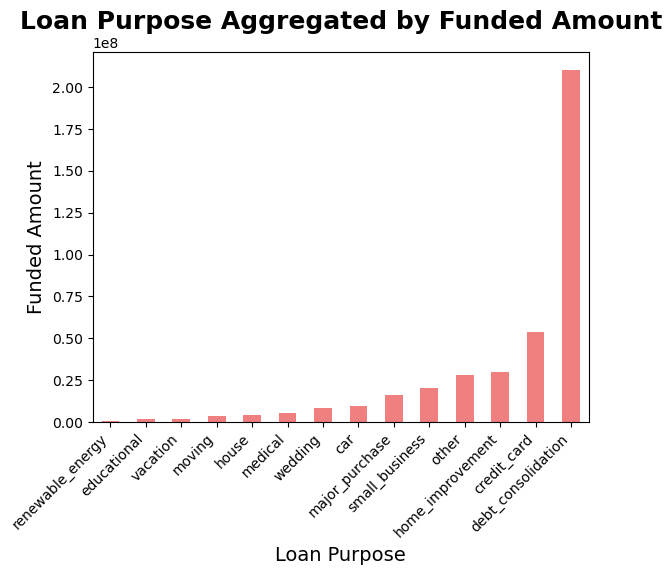

In [70]:
loan_purpose_df = loan.groupby('purpose')[['funded_amnt_inv']].sum()
loan_purpose_df.sort_values('funded_amnt_inv', ascending=True).plot(kind='bar', color='lightcoral', legend=False)

# Adding titles and labels
plt.title("Loan Purpose Aggregated by Funded Amount", color='black', fontweight='bold', fontsize=18)
plt.xlabel("Loan Purpose", fontsize=14)
plt.ylabel("Funded Amount", fontsize=14)

# Display the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

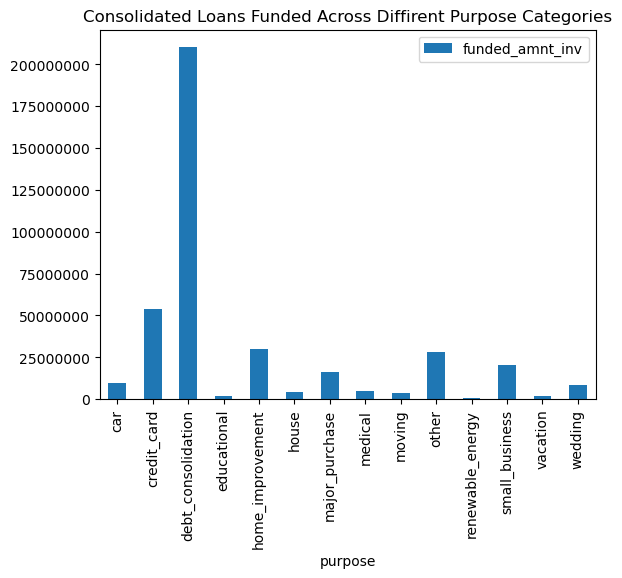

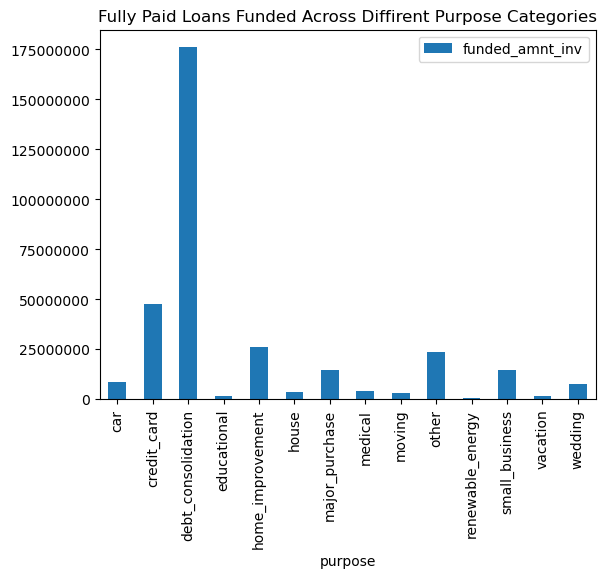

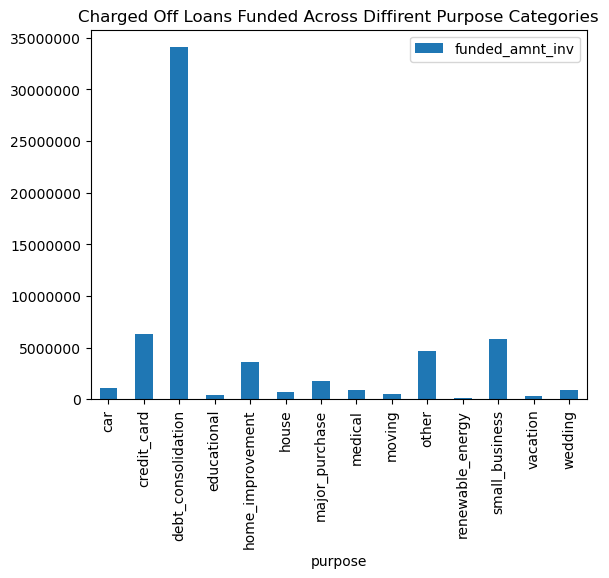

In [52]:
loan_purpose_df_consolidated = loan.groupby('purpose')[['funded_amnt_inv']].sum()
loan_purpose_df_consolidated.plot(kind="bar", title="Consolidated Loans Funded Across Diffirent Purpose Categories")
plt.xticks(horizontalalignment="center")
# Modifying the ticks to show information in (million dollars)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()


loan_purpose_df_paidoff = loan_fully_paid.groupby('purpose')[['funded_amnt_inv']].sum()
loan_purpose_df_paidoff.plot(kind="bar", title="Fully Paid Loans Funded Across Diffirent Purpose Categories")
plt.xticks(horizontalalignment="center")
# Modifying the ticks to show information in (million dollars)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()


loan_purpose_df_defaulted = loan_charged_off.groupby('purpose')[['funded_amnt_inv']].sum()
loan_purpose_df_defaulted.plot(kind="bar", title="Charged Off Loans Funded Across Diffirent Purpose Categories")
plt.xticks(horizontalalignment="center")
# Modifying the ticks to show information in (million dollars)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

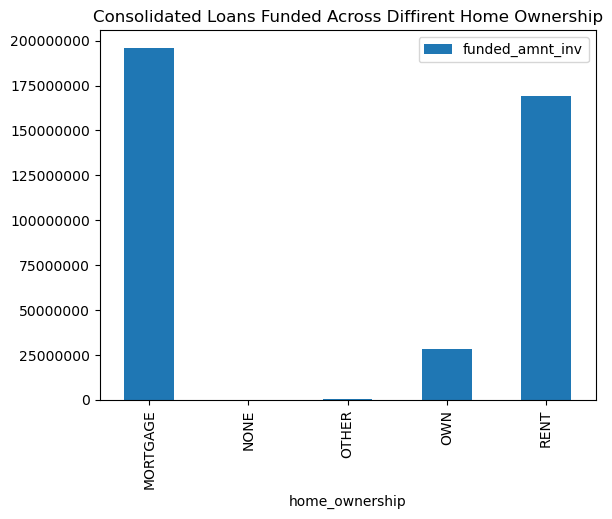

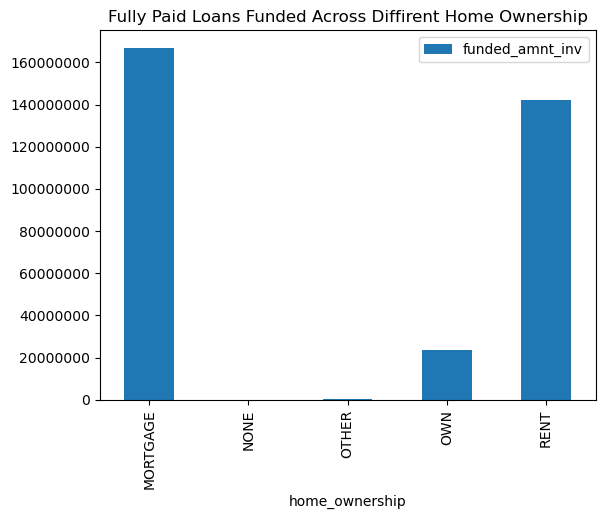

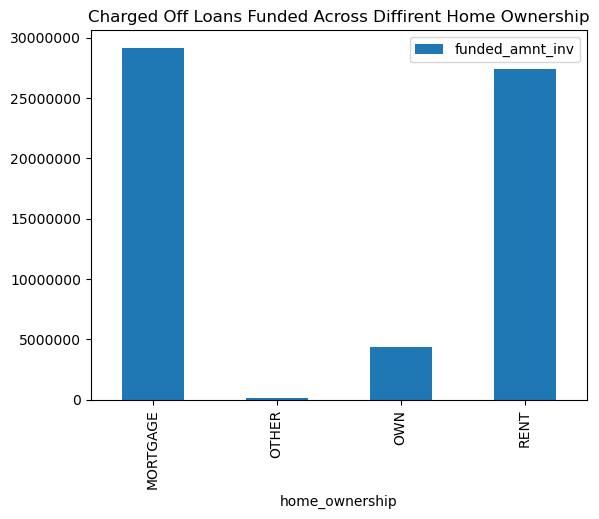

In [54]:
loan_purpose_df_consolidated = loan.groupby('home_ownership')[['funded_amnt_inv']].sum()
loan_purpose_df_consolidated.plot(kind="bar", title="Consolidated Loans Funded Across Diffirent Home Ownership")
plt.xticks(horizontalalignment="center")
# Modifying the ticks to show information in (million dollars)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()


loan_purpose_df_paidoff = loan_fully_paid.groupby('home_ownership')[['funded_amnt_inv']].sum()
loan_purpose_df_paidoff.plot(kind="bar", title="Fully Paid Loans Funded Across Diffirent Home Ownership")
plt.xticks(horizontalalignment="center")
# Modifying the ticks to show information in (million dollars)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()


loan_purpose_df_defaulted = loan_charged_off.groupby('home_ownership')[['funded_amnt_inv']].sum()
loan_purpose_df_defaulted.plot(kind="bar", title="Charged Off Loans Funded Across Diffirent Home Ownership")
plt.xticks(horizontalalignment="center")
# Modifying the ticks to show information in (million dollars)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

loan_status            0            1  %default of total default  %defalt of Loan disbursal
addr_state                                                                                 
NE              0.162499     0.388542                        0.0                       29.0
SD             13.917500    43.285071                        0.0                       24.0
NV            114.309711   364.807239                        2.0                       24.0
AK             19.540407    68.928862                        0.0                       22.0
UT             49.587642   204.655093                        1.0                       20.0
FL            505.771461  2200.431015                        8.0                       19.0
WA            145.313609   664.969282                        2.0                       18.0
NJ            318.082474  1604.969760                        5.0                       17.0
OR             74.327973   351.390048                        1.0                

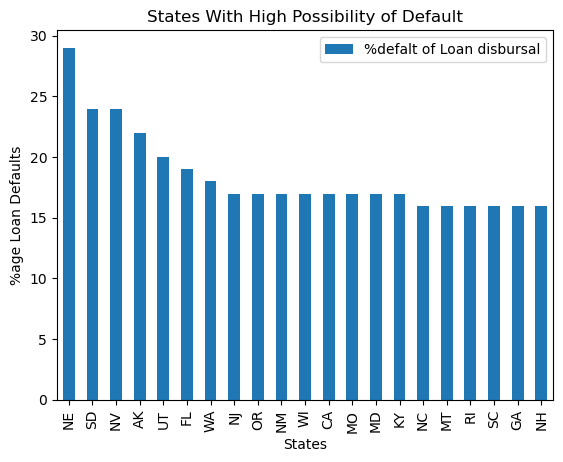

In [56]:
#analyse impact of state on percentage of total loan paid
func=lambda x : np.sum(x)/10000
raw_table=pd.pivot_table(loan, index='addr_state',columns='loan_status',values='funded_amnt_inv',aggfunc=func)
raw_table["%default of total default"] = round((raw_table[0]/raw_table[0].sum())*100)
raw_table["%defalt of Loan disbursal"] = round((raw_table[0]/(raw_table[1]+raw_table[0]))*100)
state_default=raw_table[raw_table["%defalt of Loan disbursal"]>15].sort_values(by='%defalt of Loan disbursal', ascending=False)
print (state_default)
#plot relevant graphs
state_default.plot(kind='bar', ylabel='%age Loan Defaults', xlabel='States', y='%defalt of Loan disbursal')
plt.title("States With High Possibility of Default")
plt.show()

loan_status         0         1  %default of total default  %defalt of Loan disbursal
zip_code                                                                             
438xx        3.161106  1.100000                        0.0                       74.0
746xx        5.297500  1.919300                        0.0                       73.0
496xx        4.095000  1.712500                        0.0                       71.0
673xx        1.200000  0.496058                        0.0                       71.0
561xx        4.509597  1.962500                        0.0                       70.0
203xx        1.575000  0.715000                        0.0                       69.0
608xx        4.677500  2.176444                        0.0                       68.0
215xx        2.200000  1.110000                        0.0                       66.0
371xx        0.960000  0.486209                        0.0                       66.0
668xx        2.500000  1.315000                       

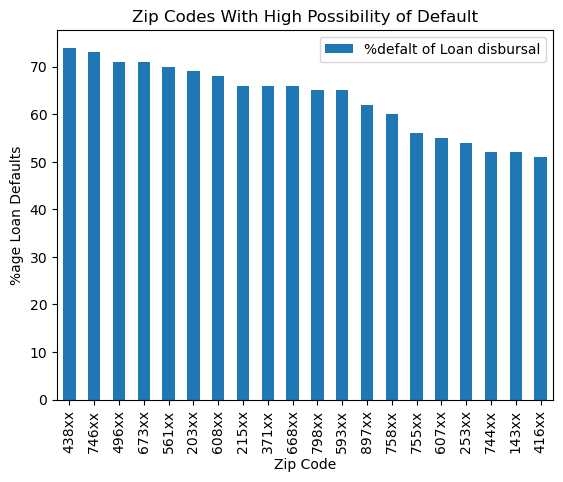

In [58]:
#analyse impact of zipcode on percentage of total loan paid
func=lambda x : np.sum(x)/10000
raw_table=pd.pivot_table(loan, index='zip_code',columns='loan_status',values='funded_amnt_inv',aggfunc=func)
raw_table["%default of total default"] = round((raw_table[0]/raw_table[0].sum())*100)
raw_table["%defalt of Loan disbursal"] = round((raw_table[0]/(raw_table[1]+raw_table[0]))*100)
zip_default=raw_table[raw_table["%defalt of Loan disbursal"]>50].sort_values(by='%defalt of Loan disbursal', ascending=False)
print (zip_default)
#plot relevant graphs
zip_default.plot(kind='bar', ylabel='%age Loan Defaults', xlabel='Zip Code', y='%defalt of Loan disbursal')
plt.title("Zip Codes With High Possibility of Default")
plt.show()

loan_status                   0             1  %default of total default  %defalt of Loan disbursal
purpose                                                                                            
small_business       585.444310   1444.905545                       10.0                       29.0
educational           36.589579    145.870416                        1.0                       20.0
renewable_energy      14.399654     62.479715                        0.0                       19.0
medical               85.779975    432.055454                        1.0                       17.0
other                463.938806   2344.855589                        8.0                       17.0
debt_consolidation  3408.223495  17613.126275                       56.0                       16.0
house                 70.016359    363.699906                        1.0                       16.0
vacation              29.910826    162.800680                        0.0                       16.0


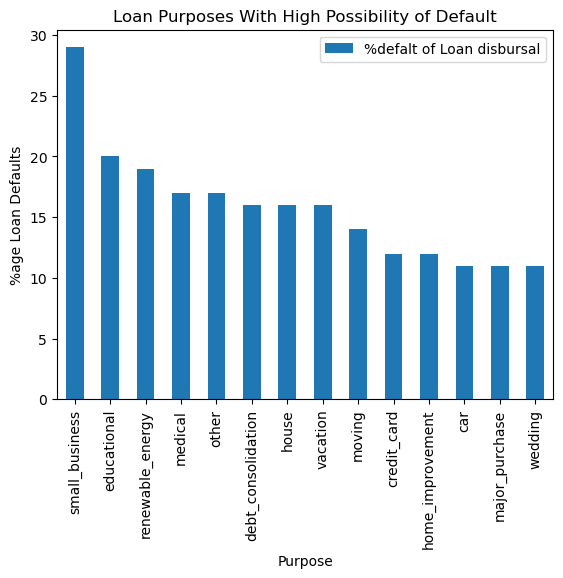

In [60]:
#analyse impact of purpose on percentage of total loan paid
func=lambda x : np.sum(x)/10000
raw_table=pd.pivot_table(loan, index='purpose',columns='loan_status',values='funded_amnt_inv',aggfunc=func)
raw_table["%default of total default"] = round((raw_table[0]/raw_table[0].sum())*100)
raw_table["%defalt of Loan disbursal"] = round((raw_table[0]/(raw_table[1]+raw_table[0]))*100)
purpose_default=(raw_table.sort_values(by='%defalt of Loan disbursal', ascending=False))
print (purpose_default)
#plot relevant graphs
purpose_default.plot(kind='bar', ylabel='%age Loan Defaults', xlabel='Purpose', y='%defalt of Loan disbursal')
plt.title("Loan Purposes With High Possibility of Default")
plt.show()

In [62]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

loan_status             0      1  %default of total default  %defalt of Loan disbursal
verification_status                                                                   
Verified             2051  10155                       36.0                       17.0
Source Verified      1434   8243                       25.0                       15.0
Not Verified         2142  14552                       38.0                       13.0


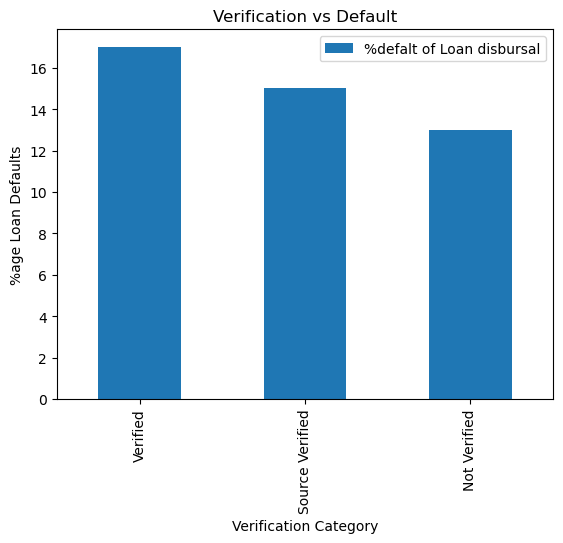

In [64]:
#analyse impact of verification on percentage of total loan paid
func=lambda x : np.sum(x)/10000
raw_table=pd.pivot_table(loan, index='verification_status',columns='loan_status',values='funded_amnt_inv',aggfunc='count')
raw_table["%default of total default"] = round((raw_table[0]/raw_table[0].sum())*100)
raw_table["%defalt of Loan disbursal"] = round((raw_table[0]/(raw_table[1]+raw_table[0]))*100)
verification_default=(raw_table.sort_values(by='%defalt of Loan disbursal', ascending=False))
print (verification_default)
#plot relevant graphs
verification_default.plot(kind='bar', ylabel='%age Loan Defaults', xlabel='Verification Category', y='%defalt of Loan disbursal')
plt.title("Verification vs Default")
plt.show()

loan_status            0             1  %default of total default  %defalt of Loan disbursal
grade                                                                                       
A             441.974198   7742.303800                        7.0                        5.0
B            1388.838582  10452.996513                       23.0                       12.0
C            1314.487469   6401.156013                       22.0                       17.0
D            1215.562461   4491.693123                       20.0                       21.0
E            1024.339567   2777.616785                       17.0                       27.0
F             558.753605   1062.364411                        9.0                       34.0
G             169.510267    393.668636                        3.0                       30.0


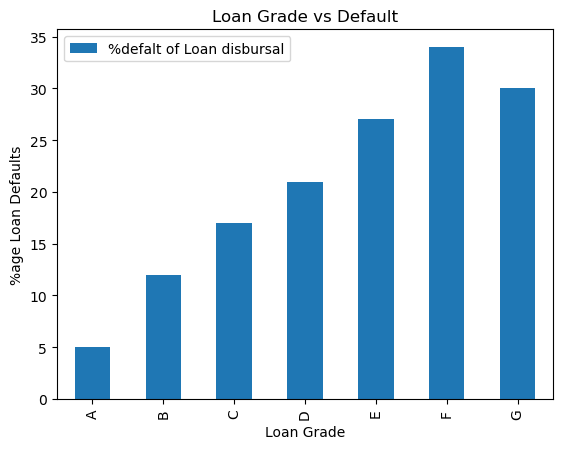

In [66]:
#analyse impact of loan grade rating on percentage of total loan paid
func=lambda x : np.sum(x)/10000
raw_table=pd.pivot_table(loan, index='grade',columns='loan_status',values='funded_amnt_inv',aggfunc=func)
raw_table["%default of total default"] = round((raw_table[0]/raw_table[0].sum())*100)
raw_table["%defalt of Loan disbursal"] = round((raw_table[0]/(raw_table[1]+raw_table[0]))*100)
loan_grade_default=(raw_table.sort_values(by='grade', ascending=True))
print (loan_grade_default)
#plot relevant graphs
loan_grade_default.plot(kind='bar', ylabel='%age Loan Defaults', xlabel='Loan Grade', y='%defalt of Loan disbursal')
plt.title("Loan Grade vs Default")
plt.show()

loan_status            0            1  %default of total default  %defalt of Loan disbursal
emp_length                                                                                 
nan           191.463485   646.708744                        3.0                       23.0
10           1760.297043  8365.373798                       29.0                       17.0
7             312.436364  1551.215145                        5.0                       17.0
0             571.965440  3312.162201                        9.0                       15.0
3             577.530230  3366.339706                        9.0                       15.0
5             507.884734  2825.525137                        8.0                       15.0
6             343.863582  1957.058736                        6.0                       15.0
8             236.718875  1323.043183                        4.0                       15.0
1             400.691554  2434.170747                        7.0                

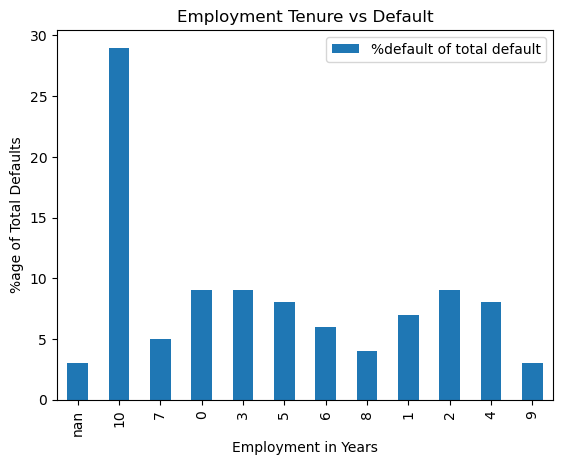

In [68]:
#analyse impact of employment tenure on percentage of total loan paid
func=lambda x : np.sum(x)/10000
raw_table=pd.pivot_table(loan, index='emp_length',columns='loan_status',values='funded_amnt_inv',aggfunc=func)
raw_table["%default of total default"] = round((raw_table[0]/raw_table[0].sum())*100)
raw_table["%defalt of Loan disbursal"] = round((raw_table[0]/(raw_table[1]+raw_table[0]))*100)
emply_default=(raw_table.sort_values(by='%defalt of Loan disbursal', ascending=False))

print (emply_default)
#plot relevant graphs
emply_default.plot(kind='bar', ylabel='%age of Total Defaults', xlabel='Employment in Years', y='%default of total default')
plt.title("Employment Tenure vs Default")
plt.show()